In [1]:
import xarray as xr
import PMMPIESM as PM
import glob
import numpy as np

In [2]:
path = '/work/mh0727/m300524/experiments/results/'

In [40]:
tos = xr.open_dataarray(path+'control_tsw_mm.nc')

In [37]:
light = xr.open_dataarray(path+'control_soflwac_mm.nc')

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/coding/times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/coding/variables.py:69: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array)


In [8]:
fe = xr.open_dataarray(path+'control_dfeos_mm.nc')

In [5]:
po4 = xr.open_dataarray(path+'control_po4os_mm.nc')

In [10]:
no3 = xr.open_dataarray(path+'control_no3os_mm.nc')

In [41]:
ds_nut = xr.merge([fe,po4,no3])
ds_tp = xr.merge([tos,light])

# Nutrient availability

Context: value of 1 means limited by nutrient. The less the more primary productivity.

In [44]:
nutlim, iron_lim, nitrate_lim, phos_lim = PM.hamocc.get_nutlimf(ds_nut)

In [45]:
nutlim_seasonality = nutlim.groupby('time.month').mean('time')

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


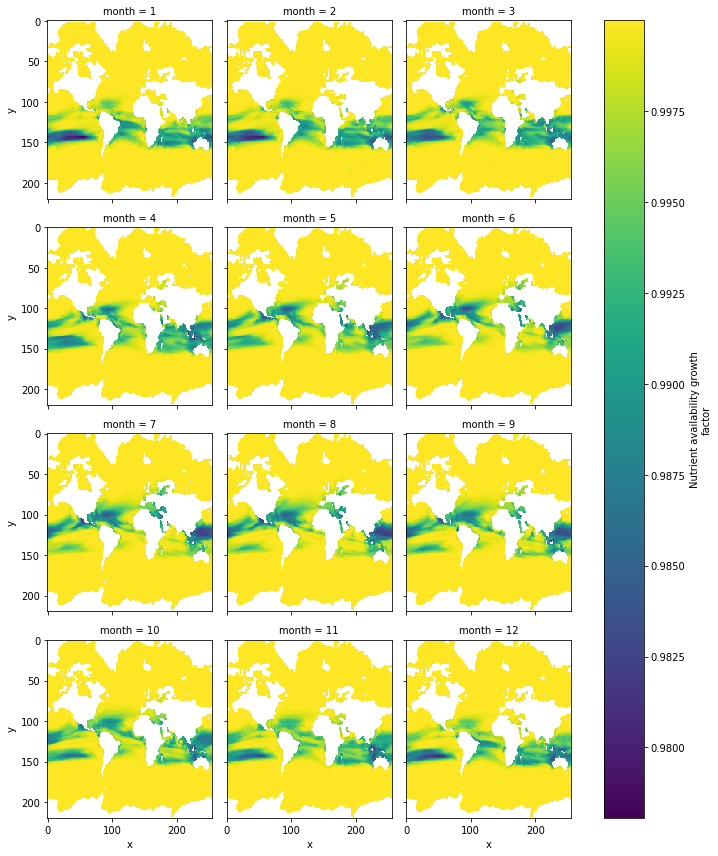

In [46]:
nutlim_seasonality.plot(col='month',col_wrap=3, yincrease=False)

In [63]:
iron_lim_seasonality = iron_lim.groupby('time.month').mean('time')

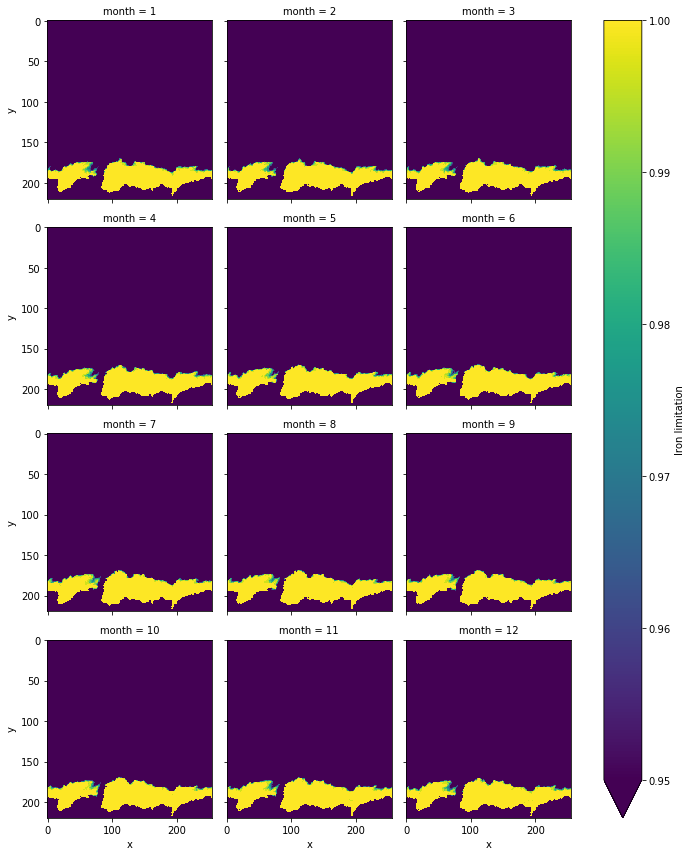

In [65]:
iron_lim_seasonality.plot(col='month',col_wrap=3, yincrease=False, vmin=.95)

In [71]:
nitrate_lim_seasonality = nitrate_lim.groupby('time.month').mean('time')

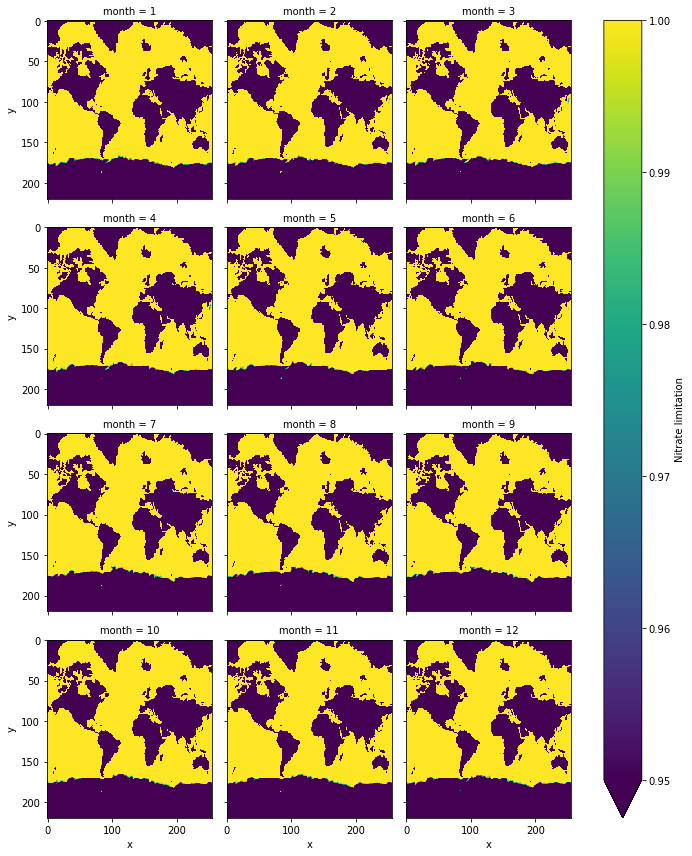

In [73]:
nitrate_lim_seasonality.plot(col='month',col_wrap=3, yincrease=False, vmin=.95)

# Temp light dependence

Temperature-light dependent primary productivity growth factor. The larger the more PP.

In [47]:
ds.data_vars

Data variables:
    tos      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    soflwac  (time, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    dfeos    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    po4os    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    no3os    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan

In [49]:
def temfa_phofa(ds):
    temfa = .6 * 1.066 ** (ds['tsw'] - 273.15)
    phofa = ds['soflwac'] * 0.02
    return temfa * phofa / (np.sqrt( phofa ** 2 + temfa ** 2 ))

In [50]:
tp = temfa_phofa(ds_tp)

In [51]:
tp_seasonality = tp.groupby('time.month').mean('time')

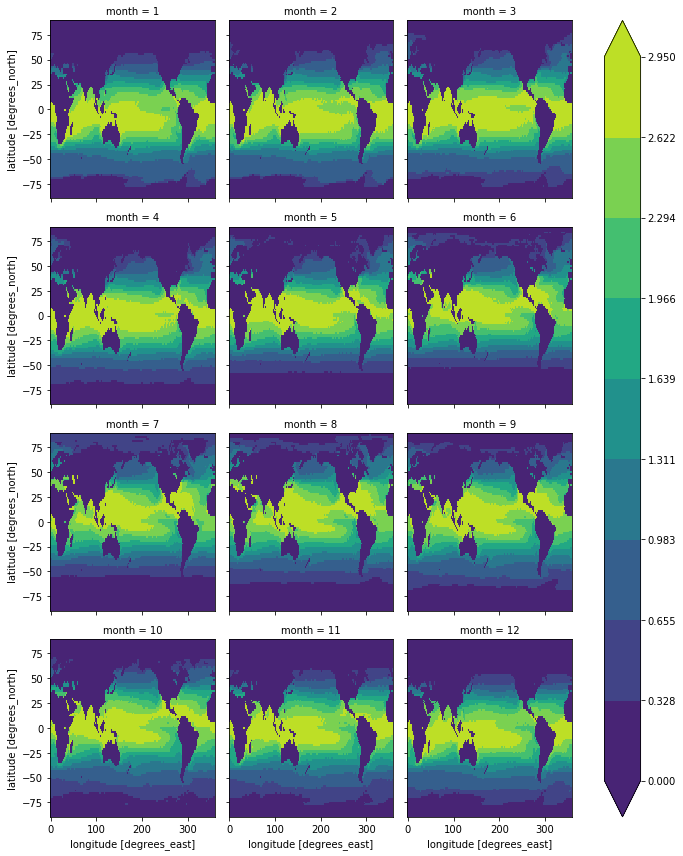

In [62]:
tp_seasonality.plot(col='month',col_wrap=3, cmap='viridis', robust=True, levels=10, vmin=0)

# cyanos